# Akademi (Flatiron School) — Data Science & AI, Cohorte 2025

# First Project-Phase 1

**Student Name**: Micka LOUIS  
**Student Pace**: Self-paced  
**Submission Deadline**: June 8, 2025  
**Instructors' Names**: Wedter JEROME & Geovany Batista Polo LAGUERRE  
**Blog Post URL**: https://github.com/Micka-Louis/dsc-project-phase-1.git  

# **Project Title**

# US Aviation Accidents Analysis(1962-2023)
![Cover](images/image1.webp)

# Overview  

This notebook presents a structured analysis of aviation accident data. It follows the CRISP-DM methodology, offering insight into understanding and preparing data for decision-making in aviation safety.



# Business Understanding  

![Business](images/image3.jpg)
Aviation safety is essential to public trust and operational efficiency. Understanding past accidents helps stakeholders identify systemic issues and implement safety improvements.

# Business Problem

![Cover](images/image2.avif)
The company is planning to expand into new industries as part of a broader diversification strategy. One of the targeted areas is aviation — specifically, the purchase and operation of aircraft for commercial and private services. However, the company currently lacks knowledge about the aviation industry, particularly regarding the safety and risk profiles of different aircraft.

The objective is to identify which aircraft models present the lowest operational risk, using historical data on aircraft incidents and accidents. The goal is to provide data-driven insights that will guide the head of the new aviation division in selecting the safest and most reliable aircraft to purchase.

To support this effort, aviation safety data will be sourced, explored, and analyzed, with the results translated into actionable business recommendations that reduce risk and support informed decision-making in this new venture.

# Data Understanding  

We are using a dataset of aviation accidents with attributes such as weather, aircraft model, number of injuries, and flight phase. This helps in assessing causes and risk zones.

In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

In [2]:
# Load the dataset AviationData
df = pd.read_csv('Data/AviationData.csv', encoding='ISO-8859-1', low_memory=False)
# Show the first 5 rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Load the dataset USState_Codes

df1=pd.read_csv('Data/USState_Codes.csv')
df1.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [4]:
# Display the shape of the DataFrame, i.e., number of rows and columns
print("Shape of the DataFrame (rows, columns):", df.shape)

# Display the column names of the DataFrame
print("Column names:", df.columns)

# Display summary information about the DataFrame (column types, non-null counts, memory usage)
print("DataFrame info:")
print(df.info())

Shape of the DataFrame (rows, columns): (88889, 31)
Column names: Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Typ

In [ ]:
df['Country'].value_counts().head()

In [ ]:
df['Investigation.Type'].value_counts()

In [ ]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


# Data Understanding Conclusion
From the initial exploration of the dataset, we observed the following:

The vast majority of the records come from the United States, which is expected since the data source is the NTSB (National Transportation Safety Board).
The Investigation.Type column indicates that the dataset includes different types of events. However, since our focus is on analyzing aircraft accidents, we will filter the dataset to include only records labeled as "Accident".
As a result, the dataset will be narrowed down to only Accidents that occurred in the United States.

# Data Preparation

🧹 1. Data Cleaning  
We'll: 

- Keep relevant columns only  
- Handle missing values  
- Filter the dataset  
- Cleaning of Data

**Keep relevant columns only**  

To simplify the analysis and improve data readability, we select only the relevant columns that provide significant value for the study.

In [5]:
# Keep only important columns
cols_to_keep = ['Investigation.Type','Event.Date', 'Location','Country',
                'Aircraft.damage', 'Make','Model','Amateur.Built','Engine.Type','Purpose.of.flight','Total.Fatal.Injuries',
                'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
                'Weather.Condition', 'Broad.phase.of.flight']
df = df[cols_to_keep]
df

,Investigation.Type,Event.Date,Location,Country,Aircraft.damage,Make,Model,Amateur.Built,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Destroyed,Stinson,108-3,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Destroyed,Piper,PA24-180,No,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown
2,Accident,1974-08-30,"Saltville, VA",United States,Destroyed,Cessna,172M,No,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise
3,Accident,1977-06-19,"EUREKA, CA",United States,Destroyed,Rockwell,112,No,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise
4,Accident,1979-08-02,"Canton, OH",United States,Destroyed,Cessna,501,No,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,"Annapolis, MD",United States,NaN,PIPER,PA-28-151,No,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN
88885,Accident,2022-12-26,"Hampton, NH",United States,NaN,BELLANCA,7ECA,No,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
88886,Accident,2022-12-26,"Payson, AZ",United States,Substantial,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN
88887,Accident,2022-12-26,"Morgan, UT",United States,NaN,CESSNA,210N,No,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN


**Handling Missing Values**  

✅ Identify which columns contain missing (null) values.  
✅ Assess the amount of data cleaning required.   

   Identify which columns contain missing (null) values
   Count Missing Values per Column
   Before performing any serious data analysis, it is important to understand how complete the dataset is.  

This step helps us:  

Identify which columns contain missing (null) values.  
Assess the amount of data cleaning required.  
We use the `.isnull().sum()` method to count the number of missing values in each colum  

In [18]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
missing_values

Country                   0
State.Name                0
State.Code                0
Investigation.Type        0
Event.Date                0
Aircraft.damage           0
Make                      0
Model                     0
Amateur.Built             0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Event.Year                0
Event.Month               0
Total Injuries            0
dtype: int64

In [ ]:
# Sort the columns by number of missing values in descending order
missing_values = missing_values.sort_values(ascending=False)
missing_values

**Filter the dataset**

Given that the dataset is primarily focused on the United States (as it comes from the NTSB), we filtered the data to include only U.S.-based events. Additionally, since our analysis concerns aircraft safety and risk, we restricted the dataset to records labeled as actual Accidents, excluding other types of investigations.

In [6]:
# Filter the dataset to include only records where the event occurred in the United States.
df = df[df['Country'] == 'United States']

In [ ]:
# Check the distribution of the 'Country' column to confirm the dominance of U.S. data.
df['Country'].value_counts()

In [7]:
# Filter the dataset to keep only records classified as actual 'Accidents'.
df = df[df['Investigation.Type'] == 'Accident']

In [ ]:
# Check the distribution of the 'Investigation.Type' column to verify the types of investigations recorded.
df['Investigation.Type'].value_counts()

**Cleaning of Data**

In [8]:
# Step 1: Replace variants of 'unknown' and 'unk' with 'Other' for consistency
df.replace(
    to_replace=['Unknown', 'UNKNOWN','OTHER','Other', 'unknown', 'unk', 'UNK'],
    value='Other',
    inplace=True
)

# Step 2: Replace other placeholder strings like 'None', 'Unavailable', 'N/A', etc. with actual NaN values
df.replace(
    to_replace=['Unavailable', 'UNAVAILABLE', 'None', 'NONE', 'none', 'N/A', 'n/a'],
    value=pd.NA,
    inplace=True
)

# Step 3: Fill missing values in numerical columns with the median of each column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Step 4: Fill missing values in categorical columns with the mode (most frequent value) of each column
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if not df[col].mode().empty:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
# Visualize missing data across all columns using a heatmap.
# Each blue mark indicates a missing value (NaN), helping to quickly identify columns with missing data.
sb.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Blues')


In [9]:
# Drop rows where 'Make','Model' or 'Location' is missing, assuming we have enough data to afford this loss.
df.dropna(subset=['Make', 'Model', 'Location'], inplace=True)


# 2. Feature Engineering

In this section, we will engineer new features and clean existing ones to make the dataset more suitable for analysis and modeling.  
We'll:  

- Parse Dates Properly
- Adding New Columns to Data Set for Analysis

**📅 Parse dates properly**  

It is important to convert the 'Event.Date' column from string format to a proper datetime format. This enables easier manipulation and analysis of date information.  

After converting, we extract both the year and the month from the event date into new columns called 'Event.Year' and 'Event.Month'. These columns help in analyzing the data based on the year and the exact month of the event.

In [10]:
# Convert 'Event.Date' column to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')


# Extract the year from 'Event.Date' and create a new column 'Event.Year'
df['Event.Year'] = df['Event.Date'].dt.year

# Extract the day from 'Event.Date' and create a new column 'Event.Day'
df['Event.Month'] = df['Event.Date'].dt.month

df[['Event.Year','Event.Month']].head()


,Event.Year,Event.Month
0,1948,10
1,1962,7
2,1974,8
3,1977,6
4,1979,8


In [11]:
# Only want data after 1982
df = df[df['Event.Year'] >= 1982].copy()

**Adding New Columns to Data Set for Analysis**  

This new feature gives a single, comprehensive measure of injury severity per accident. It helps simplify analysis and visualization by combining multiple injury columns into one.

In [12]:
# Calculate the total number of injuries for each record
df['Total Injuries'] = (
    df['Total.Fatal.Injuries'] +
    df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries']
)

# 3. Merging Datasets
🛬 Extracting U.S. State Information

To prepare the dataset for geographic analysis and ensure accuracy in merging with U.S. state names, we perform the following steps:

1. Extracting State Abbreviations from the Location Column
2. Filtering for U.S. Data Only

In [13]:
# Extract state codes from the 'Location' column (e.g., extract 'CA' from 'Los Angeles, CA')
df['State.Code'] = df['Location'].str.extract(r',\s*([A-Z]{2})$')

# Merge with df1 to get full state name
df = df.merge(df1, left_on='State.Code', right_on='Abbreviation', how='left')


In [14]:
# Rename the merged state column for clarity
df.rename(columns={'US_State': 'State.Name'}, inplace=True)


In [15]:
# Drop the 'Location' and 'Abbreviation' columns now that we've extracted the necessary information
df.drop(columns=['Location', 'Abbreviation'], inplace=True)


In [16]:
# Reorder the columns so Country, State.Code, and State.Name appear together at the front
cols = df.columns.tolist()

# Remove the 3 columns
for col in ['Country', 'State.Code', 'State.Name']:
    cols.remove(col)

# Place them at the front
new_order = ['Country','State.Name', 'State.Code'] + cols

# Reorder the dataframe
df = df[new_order]


In [17]:
# Drop rows where 'State.Name' or 'State.Code'  is missing, assuming we have enough data to afford this loss.
df.dropna(subset=['State.Name', 'State.Code'], inplace=True)


In [19]:
# Get current column list
cols = df.columns.tolist()

# Remove the columns we want to move
cols.remove('Event.Year')
cols.remove('Event.Month')

# Create new column order with year and month first
new_cols = ['Event.Year', 'Event.Month'] + cols

# Reindex the DataFrame
df = df[new_cols]

- After cleaning the Data save the DataFrame to a CSV file or to an Excel file.

**Important**

In [20]:
# Strip whitespace in one line  
df.columns = df.columns.str.strip()  

# Save the cleaned and enriched DataFrame to a CSV file
df.to_csv('cleaned_AviationUSData.csv', index=False)

# Import the regular expression used by openpyxl to detect illegal characters
from openpyxl.cell.cell import ILLEGAL_CHARACTERS_RE

# Apply cleaning to all string-type columns to remove characters not supported by Excel
df= df.applymap(lambda x: ILLEGAL_CHARACTERS_RE.sub('', x) if isinstance(x, str) else x)

# Save the cleaned DataFrame to an Excel file
df.to_excel('cleaned_AviationUSData.xlsx', index=False)


# 📊 Data Exploration

In [ ]:
# Display statistical summary of numerical columns in the dataset
df.describe()

# 1. Accident Trend Over the Years

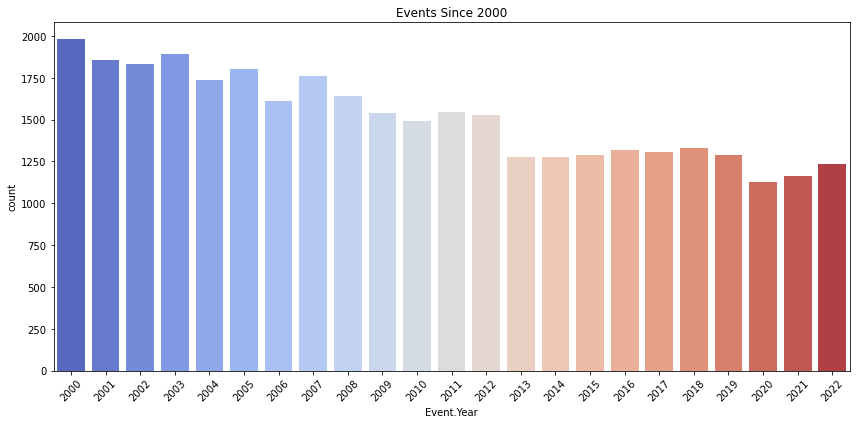

In [21]:
recent_df = df[df['Event.Year'] >= 2000]
plt.figure(figsize=(12,6))
sb.countplot(x='Event.Year', data=recent_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Events Since 2000')
plt.tight_layout()
plt.show()

**U.S. Aviation Accidents (2000–2022):**  
The bar chart shows a clear downward trend in aviation accidents over the years. In 2000, there were about 2 000 accidents. By 2010, this dropped to about 1 500, reflecting significant progress in aviation safety.The lowest point was in 2020 with 1,131 accidents, likely due to reduced flight activity during the COVID-19 pandemic. A slight uptick appears in 2021 (1,173) and 2022 (1,237) as air travel resumed. Overall, the chart highlights a steady improvement in safety standards, driven by technological advances, stronger regulations, and better training.

**- Accident Trend by Month**

<AxesSubplot:xlabel='Event.Month', ylabel='count'>

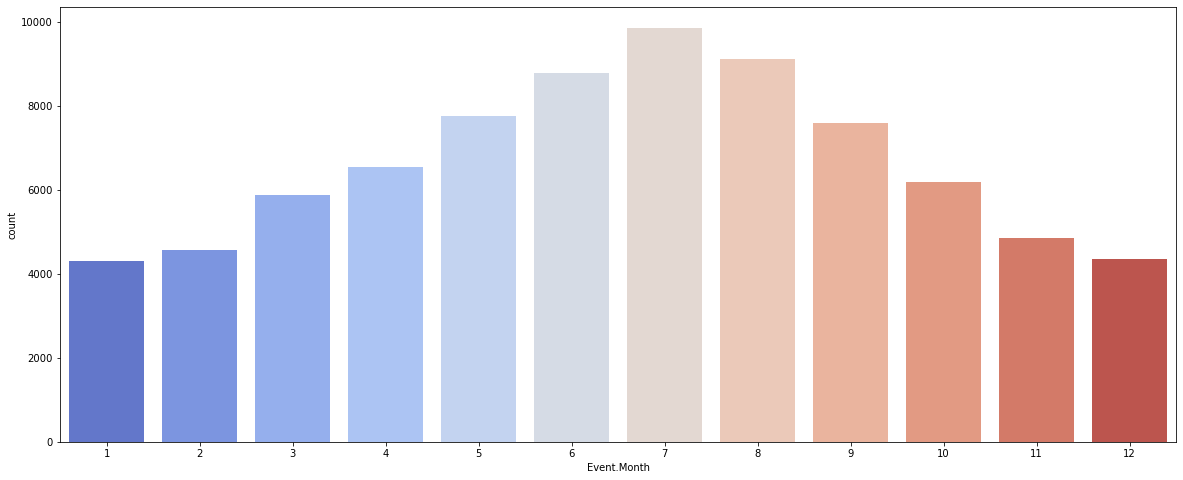

In [22]:
plt.figure(figsize=(20,8))
sb.countplot(x='Event.Month', data=df, palette='coolwarm') 

Most Accidents occur between June and August

# 2. Total Injury Count Over The Years (Time Based Analysis)
Exploratory Analysis  

Total Injury Count Over the Years

In [23]:
by_year = df.groupby('Event.Year').sum()

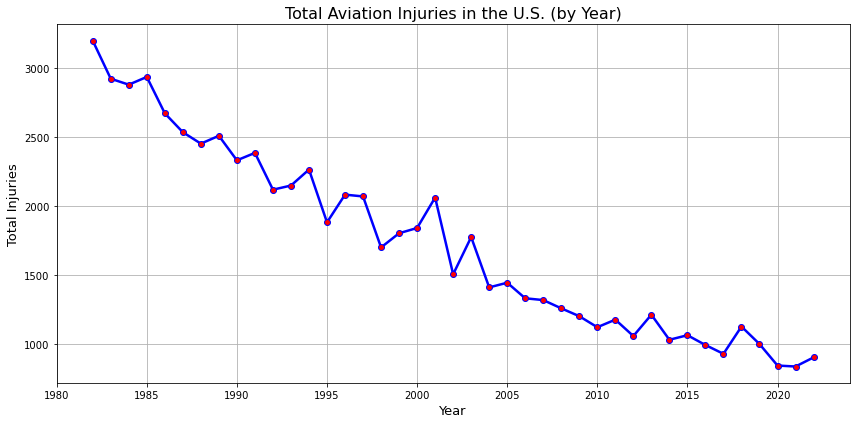

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(by_year.index, by_year['Total Injuries'], color='blue', linewidth=2.5, marker='o', markersize=6, markerfacecolor='red')

plt.title('Total Aviation Injuries in the U.S. (by Year)', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Total Injuries', fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.show()

The line shows a declining trend in total aviation injuries, with zigzag fluctuations year to year. Long-term decline reflects improved safety, better technology, and stricter regulations. Zigzags suggest occasional spikes due to major accidents or traffic changes. 2020 drop likely caused by COVID-19; slight rebound after as flights resumed.  

✅ Overall, fewer injuries over time = safer skies

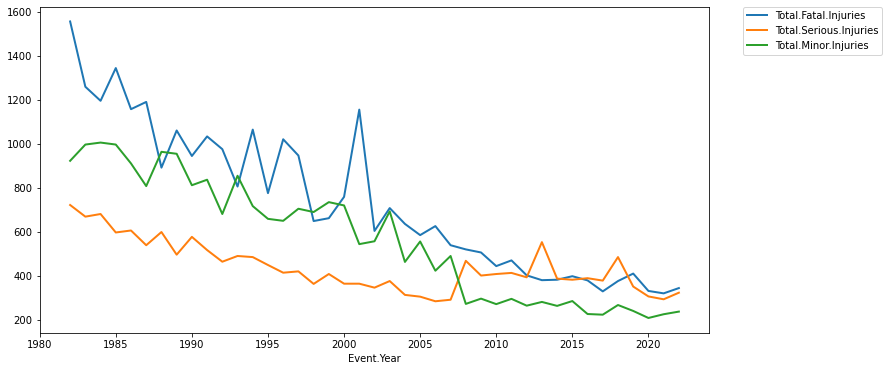

In [24]:
by_year[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].plot(lw = 2, figsize=(12,6))
# to move the legend outside of graph
plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0)

- Based on the two graphs above, we can see that Injury Count is on a downward trend for all kinds of injuries.

# 3. Phase of Flight Analysis
Exploratory Analysis

In [25]:
by_phase = df.groupby('Broad.phase.of.flight').sum().reset_index()
by_phase = by_phase.drop(['Event.Year','Event.Month'], axis=1)
by_phase

,Broad.phase.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total Injuries
0,Approach,3822.0,1894.0,2391.0,9673.0,8107.0
1,Climb,1740.0,592.0,857.0,6496.0,3189.0
2,Cruise,6056.0,2103.0,3798.0,21897.0,11957.0
3,Descent,904.0,465.0,881.0,13173.0,2250.0
4,Go-around,587.0,384.0,618.0,1392.0,1589.0
5,Landing,6523.0,7181.0,7039.0,96575.0,20743.0
6,Maneuvering,5262.0,1906.0,1959.0,5887.0,9127.0
7,Other,735.0,58.0,35.0,571.0,828.0
8,Standing,147.0,228.0,323.0,10681.0,698.0
9,Takeoff,4232.0,3107.0,4840.0,21596.0,12179.0


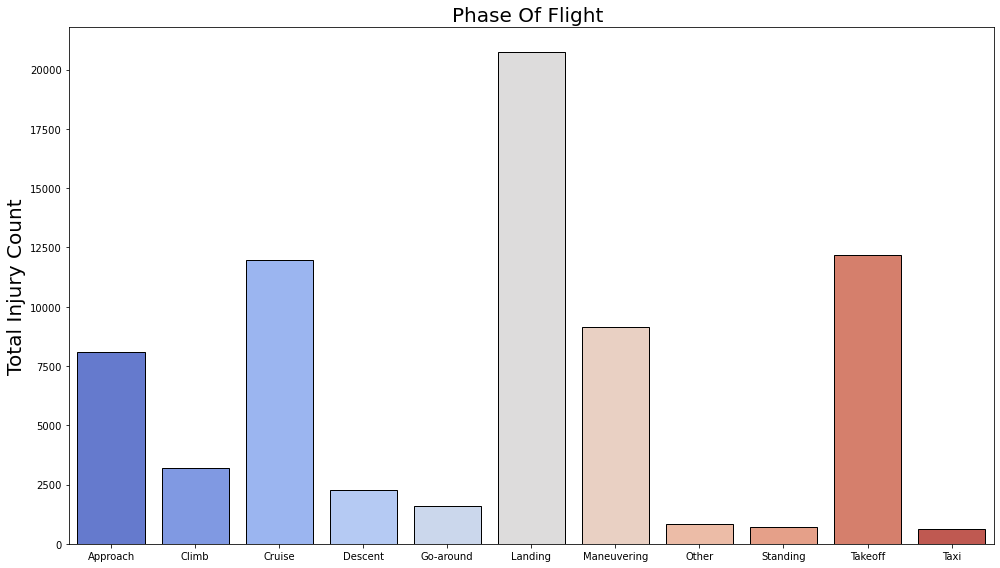

In [26]:
plt.figure(figsize = (14,8))
sb.barplot(x = 'Broad.phase.of.flight',y='Total Injuries' , data = by_phase.reset_index() , palette = 'coolwarm', ec = 'black')
plt.title('Phase Of Flight ' , size = 20)
plt.xlabel('')
plt.ylabel('Total Injury Count', size = 20)
plt.tight_layout()

- Most Accident and Injuries Sustained occured during Landing, Cruise, Takeoff.

# 4. Aircraft Manufacturer Analysis
**4.1 Aircraft Safety Analysis: Top 10 Manufacturers with Lowest Accident Rates**  

**Objective:** Identify and visualize the safest aircraft manufacturers based on historical accident data to inform procurement decisions.


In [27]:
df['Make'] = df['Make'].str.lower()

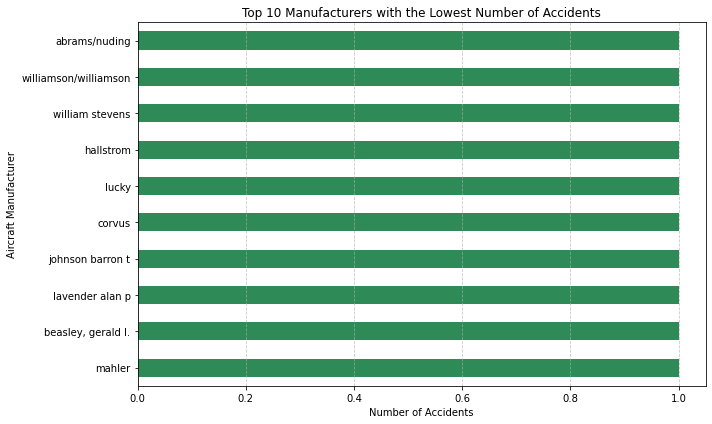

In [28]:
# Number of accidents per manufacturer
manufacturer_counts = df['Make'].value_counts()

# Select the 10 manufacturers with the lowest number of accidents
least_accident_makers = manufacturer_counts.sort_values().head(10)

# Visualization
plt.figure(figsize=(10,6))
least_accident_makers.plot(kind='barh', color='seagreen')  # Horizontal bar plot
plt.title('Top 10 Manufacturers with the Lowest Number of Accidents')  # Chart title
plt.xlabel('Number of Accidents')  # X-axis label
plt.ylabel('Aircraft Manufacturer')  # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines on the x-axis for better readability
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()  # Display the plot


The bar chart displays the 10 aircraft manufacturers with the lowest number of reported accidents. All other manufacturers have been grouped under 'OTHER' for clarity and simplicity. This analysis highlights a group of manufacturers with very few accident records. However, it is important to note that a low number of reported accidents does not necessarily indicate better safety performance — it may instead reflect a smaller fleet size, limited aircraft production, or infrequent operational use.

**4.2 Analyzing Aircraft Safety: Top 10 Manufacturers by Accident Frequency**

**Objective:** This code identifies and visualizes the aircraft manufacturers with the highest accident records to inform risk assessment decisions.

In [30]:
# Step 1: Count the number of accidents per manufacturer
manufacturer_counts = df['Make'].value_counts()

# Step 2: Select the top 10 manufacturers with the highest number of accidents
most_accident_manufacturers = manufacturer_counts.sort_values(ascending=False).head(10)
# 3. Display summary table
print("\nTop 10 Manufacturers by Accident Count:")
display(most_accident_manufacturers.to_frame('Number of Accidents').style\
    .background_gradient(cmap='Reds')\
    .set_caption('Table 1: Highest-Risk Aircraft Manufacturers'))


Top 10 Manufacturers by Accident Count:


,Number of Accidents
cessna,25558
piper,13996
beech,4890
bell,2223
mooney,1272
grumman,1131
bellanca,1036
boeing,928
robinson,916
hughes,867


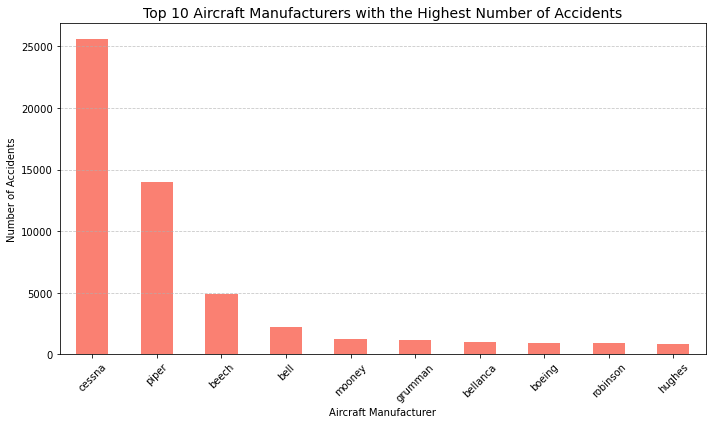

In [25]:
# Step 3: Plot the bar chart
plt.figure(figsize=(10,6))
most_accident_manufacturers.plot(kind='bar', color='salmon')
plt.title('Top 10 Aircraft Manufacturers with the Highest Number of Accidents', fontsize=14)
plt.ylabel('Number of Accidents')
plt.xlabel('Aircraft Manufacturer')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart illustrates the 10 aircraft manufacturers with the highest number of reported accidents in the dataset. These manufacturers represent a significant portion of all recorded aviation incidents. The large number of accidents reported for some manufacturers may be due to their widespread use, high production volumes, and long operational history rather than inherently lower safety standards.

For instance, some companies produce a large number of general aviation aircraft used for training, personal flights, and commercial purposes — all of which increase exposure to accident risk over time. It is essential to consider both the number of aircraft in service and the frequency of flights when interpreting these figures, as higher accident counts often reflect broader usage rather than poor design or maintenance practices.

This visualization helps identify manufacturers with the most exposure in aviation activities and serves as a starting point for deeper analysis into accident causes, aircraft types, and flight conditions.

# ✈️5. Comparing Injury Severity Between Manufacturers with the Most and Least Reported Accidents  

This section compares the total number of fatal and serious injuries for two groups of aircraft manufacturers:

Those with the lowest number of reported accidents.
Those with the highest number of reported accidents.
The goal is to see whether fewer accidents also mean fewer injuries, or if severity varies by manufacturer regardless of frequency.

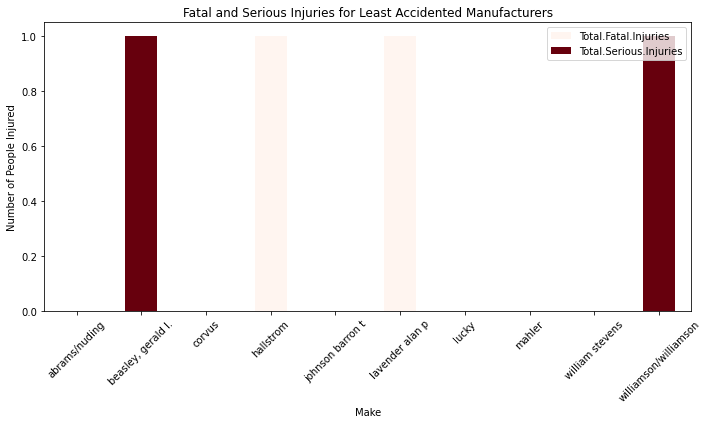

In [31]:
# Select rows where 'Make' is among the least accident-prone manufacturers
df_least = df[df['Make'].isin(least_accident_makers.index)]

# Select relevant columns for injury severity
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries']

# Sum up fatal and serious injuries by manufacturer
df_injuries_least = df_least.groupby('Make')[injury_cols].sum()

# Plotting
df_injuries_least.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Reds')
plt.title('Fatal and Serious Injuries for Least Accidented Manufacturers')
plt.ylabel('Number of People Injured')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In this bar chart, each bar represents one manufacturer with low total accident counts.The red part of the bars represents serious injuries, and the white or barely visible part represents fatal injuries (Total.Fatal.Injuries).
What we observe: For most manufacturers, the red bar (serious injuries) is small — indicating very few serious injuries.
The white (or invisible) sections suggest that fatal injuries are either zero or extremely low — almost non-existent in these cases.
For example:
some make shows a tiny red bar (from 0 to 1), indicating just 1 serious injury.
and other goes slightly higher (from 1 to 2), again indicating a very low severity level

These manufacturers may have very few accidents, and when accidents do occur, they rarely lead to serious or fatal outcomes. However, because the sample size is small, we cannot draw strong conclusions yet. These graphs suggest better outcomes per incident, but we need a rate-based metric to confirm.

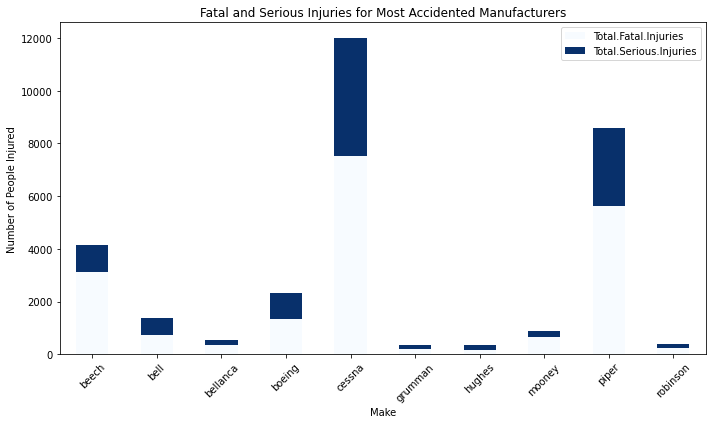

In [32]:
# Create a list of top accident manufacturers
most_accident_makers = df['Make'].value_counts().head(10)

# Filter dataset to only include those top manufacturers
df_most = df[df['Make'].isin(most_accident_makers.index)]

# Sum up fatal and serious injuries by top manufacturer
df_injuries_most = df_most.groupby('Make')[injury_cols].sum()

# Plotting
df_injuries_most.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Blues')
plt.title('Fatal and Serious Injuries for Most Accidented Manufacturers')
plt.ylabel('Number of People Injured')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This chart uses blue for serious injuries and again white or invisible for fatal injuries.Almost all 10 manufacturers show visible blue bars, meaning they recorded a significant number of serious injuries.
Notable cases: Cessna has the tallest blue bar, ranging from 8,000 to 12,000 serious injuries. It indicates the highest severity burden.
Piper also stands out, with its bar ranging from 6,000 to 9,000 serious injuries.
Other manufacturers (like Beech, Bell, Mooney) have shorter bars, but still non-zero.

These manufacturers are involved in many more accidents, and they tend to result in significant numbers of serious injuries. The white part (fatal injuries) is less visible, suggesting that while deaths occur, serious injuries dominate in frequency. However, since these manufacturers also have much larger fleets, the raw numbers might reflect greater usage, not necessarily lower safety.

**Calculate a severity ratio to see whether a manufacturer has a high injury rate per accident, not just a high total number.**

In [33]:
# Subset the DataFrame to include only the 10 manufacturers with the fewest accidents
df_least = df[df['Make'].isin(least_accident_makers.index)]

# Count the total number of accidents per manufacturer
accidents_least = df_least.groupby('Make').size()

# Sum the number of fatal and serious injuries for each manufacturer
injuries_least = df_least.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()

# Calculate severity rate = (fatal + serious injuries) / total number of accidents
injuries_least['Severity.Rate'] = (
    injuries_least['Total.Fatal.Injuries'] + injuries_least['Total.Serious.Injuries']
) / accidents_least

# Sort by severity rate in descending order and display
injuries_least = injuries_least.sort_values('Severity.Rate', ascending=False)
print(injuries_least[['Severity.Rate']])


                       Severity.Rate
Make                                
beasley, gerald l.               1.0
hallstrom                        1.0
lavender alan p                  1.0
williamson/williamson            1.0
abrams/nuding                    0.0
corvus                           0.0
johnson barron t                 0.0
lucky                            0.0
mahler                           0.0
william stevens                  0.0


Some small manufacturer like Newgent has very high severity rates (up to 2.0), meaning that each of their few accidents involved 1 or 2 serious or fatal injuries on average.
Others (like Baker, Mileski) show a severity rate of 0, suggesting their rare accidents did not involve serious or fatal injuries.However, their sample sizes are likely very small, so one severe accident significantly skews their rate.

In [34]:
# Subset the DataFrame for the 10 manufacturers with the highest number of accidents
df_most = df[df['Make'].isin(most_accident_makers.index)]

# Total number of accidents per manufacturer
accidents_most = df_most.groupby('Make').size()

# Total number of fatal and serious injuries per manufacturer
injuries_most = df_most.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries']].sum()

# Severity Rate = (fatal + serious injuries) / total number of accidents
injuries_most['Severity.Rate'] = (
    injuries_most['Total.Fatal.Injuries'] + injuries_most['Total.Serious.Injuries']
) / accidents_most

# Sort the results by severity rate in descending order and display
injuries_most = injuries_most.sort_values('Severity.Rate', ascending=False)
print(injuries_most[['Severity.Rate']])


          Severity.Rate
Make                   
boeing         2.490302
beech          0.844785
mooney         0.697327
bell           0.622132
piper          0.613104
bellanca       0.517375
cessna         0.469207
robinson       0.426856
hughes         0.420992
grumman        0.320955


Boeing stands out with the highest severity rate among the top 10: 2.49, meaning that on average, each Boeing accident involved more than 2 severe or fatal injuries. Other large manufacturers like Beech, Mooney, and Bell have moderate severity rates, ranging from 0.4 to 0.8. Despite being the most accidented, Cessna and Piper show lower severity rates (~0.47 and ~0.61), suggesting that their accidents are frequent but often less deadly.

# 📊 Top 10 Aircraft Manufacturers by Accident Severity Rate

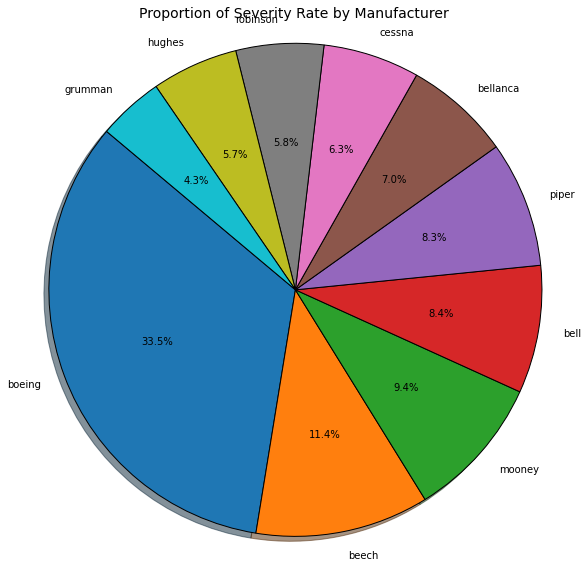

In [35]:
import matplotlib.pyplot as plt

# Data to plot
labels = injuries_most.index
sizes = injuries_most['Severity.Rate']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    wedgeprops={'edgecolor': 'black'}
)

plt.title('Proportion of Severity Rate by Manufacturer', fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()

# Display the chart
plt.show()


Conclusion: Accident frequency does not necessarily correlate with accident severity.Small manufacturers may have fewer accidents, but when accidents happen, they tend to be more serious, possibly due to limited safety features, older aircraft, or less regulatory oversight.
In contrast, large manufacturers like Cessna and Piper may have more frequent accidents due to a larger fleet size, but their severity is generally lower, indicating better safety standards or more minor incidents.Boeing, however, combines both high accident frequency and high severity, which may reflect the larger size and capacity of its aircraft — a single accident can involve many people.

# 6. Distribution of Amateur-Built Aircraft Involved in Accidents


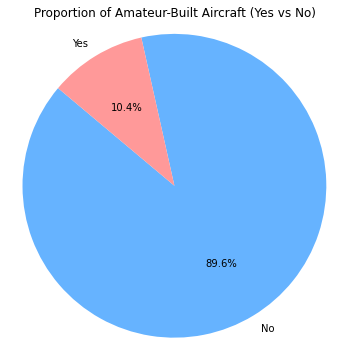

In [36]:
# Count the unique values in the 'Amateur.Built' column
amateur_counts = df['Amateur.Built'].value_counts()

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(
    amateur_counts,
    labels=amateur_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#ff9999']
)
plt.title('Proportion of Amateur-Built Aircraft (Yes vs No)')
plt.axis('equal')  # Makes sure the pie chart is circular
plt.show()


# 7. Accident Count by Weather Condition and Manufacturer – Low-Accident Manufacturers

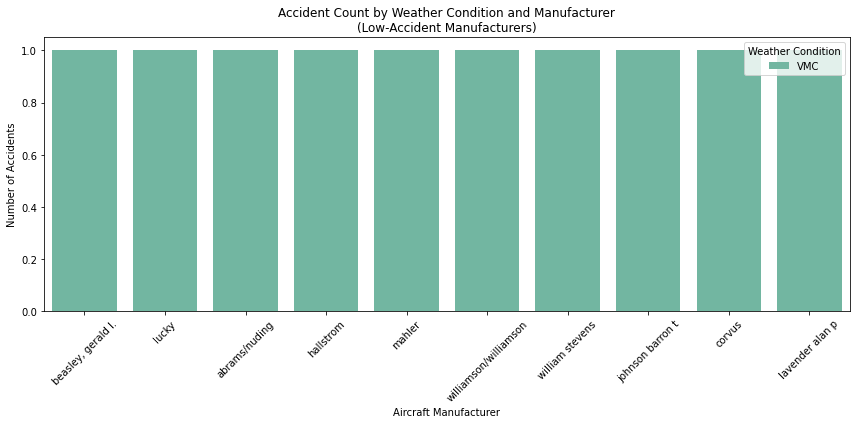

In [37]:
# Filter dataset for least accident-prone manufacturers
df_least = df[df['Make'].isin(least_accident_makers.index)]

# Plot: Weather conditions per aircraft make
plt.figure(figsize=(12, 6))
sns.countplot(data=df_least, x='Make', hue='Weather.Condition', palette='Set2')
plt.title('Accident Count by Weather Condition and Manufacturer\n(Low-Accident Manufacturers)')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()

**Accident Count by Weather Condition and Manufacturer – High-Accident Manufacturers**

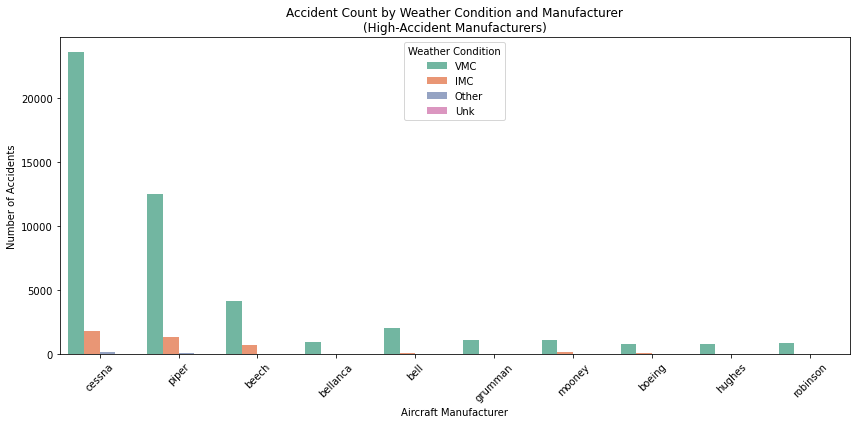

In [38]:
# Filter dataset for most accident-prone manufacturers
df_most = df[df['Make'].isin(most_accident_makers.index)]

# Plot: Weather conditions per aircraft make
plt.figure(figsize=(12, 6))
sns.countplot(data=df_most, x='Make', hue='Weather.Condition', palette='Set2')
plt.title('Accident Count by Weather Condition and Manufacturer\n(High-Accident Manufacturers)')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')
plt.tight_layout()
plt.show()


Based on these two graphs related to weather conditions, most accidents across both groups occurred in VMC (Visual Meteorological Conditions) — indicating that poor weather is not the main driver of accidents.

High-accident manufacturers also experienced incidents in IMC (Instrument Meteorological Conditions), reflecting greater operational complexity and highlighting the need for more advanced pilot training and specialized equipment.

# 8. Visualize Aircraft Accident Distribution Across US States to Identify High-Risk Areas

In [93]:
import pandas as pd
import plotly.express as px
import numpy as np

# Filter dataset for US only
df_us = df[df['Country'] == 'United States']

# Clean state names - remove unwanted entries
valid_states = [
    'Washington', 'New Jersey', 'Florida', 'New Mexico', 'Alabama',
    'Louisiana', 'Texas', 'Oklahoma', 'Arkansas', 'Utah', 'Alaska',
    'Pennsylvania', 'Michigan', 'Georgia', 'California', 'Virginia',
    'North Carolina', 'New York', 'Montana', 'Oregon', 'Nevada',
    'Indiana', 'Arizona', 'Missouri', 'Wyoming', 'Illinois',
    'South Carolina', 'Maryland', 'Ohio', 'Hawaii', 'Colorado',
    'Mississippi', 'Washington_DC', 'Idaho', 'Minnesota', 'Vermont',
    'Kansas', 'New Hampshire', 'Iowa', 'Wisconsin', 'Massachusetts',
    'Connecticut', 'Kentucky', 'Tennessee', 'Maine', 'South Dakota',
    'Nebraska', 'Rhode Island', 'North Dakota', 'West Virginia',
    'Delaware'
]

# Filter dataset for valid states only
df_us = df_us[df_us['State.Name'].isin(valid_states)]

# Count accidents per state
accidents_by_state = df_us['State.Name'].value_counts().reset_index()
accidents_by_state.columns = ['State', 'Accidents']

# State name to postal code mapping, including DC
us_state_to_code = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Washington_DC': 'DC',  # map this explicitly
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM',
    'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Map full names to codes
accidents_by_state['StateCode'] = accidents_by_state['State'].map(us_state_to_code)

# Drop any states not mapped (if any)
accidents_by_state = accidents_by_state.dropna(subset=['StateCode'])

# Create interactive choropleth map
fig = px.choropleth(
    accidents_by_state,
    locations='StateCode',
    locationmode="USA-states",
    color='Accidents',
    color_continuous_scale="Reds",
    scope="usa",
    labels={'Accidents': 'Number of Accidents'},
    title="Interactive Map: Aircraft Accidents by US State"
)


fig.show()




<Figure size 432x288 with 0 Axes>

California, Texas, and Florida show the highest number of aircraft accidents among US states. This indicates that these states represent higher-risk areas for aviation operations. For your company looking to invest and operate aircraft safely, it is crucial to consider these geographic risk factors. Expanding in states with fewer accidents could reduce exposure to operational risks. Meanwhile, if operations in high-accident states are necessary, enhanced safety measures, pilot training, and maintenance protocols should be prioritized to mitigate potential hazards.

# Conclusion and Next Steps

a. Conclusion:  

**Conclusion – Risk Analysis in Aviation (1982–2022)**

Our analysis of aviation accident data in the United States from 1962 to 2022 reveals an overall improvement in aviation safety over time. The total number of accidents and injuries has decreased, partly due to technological advances, stricter regulations, and better training. However, these general trends must be nuanced by significant differences between manufacturers, aircraft types, flight conditions, and geographic areas.

**🔎Key Takeaways:**

**Overall decline in accidents:**  

Between **2000 and 2022**, the number of accidents dropped from around **2,000 to 1,200.**

The drop is especially sharp in **2020 (linked to COVID-19)**, but remains significant in the long run.

Serious and fatal injuries follow a similar trajectory: skies are generally safer.   


**High-risk manufacturers (frequent incidents):**

Manufacturers such as Cessna and Piper account for the most accidents.Their high exposure is mainly due to their heavy presence in general aviation, including training, private flights, and light commercial use.
However, their **severity rates are moderate (~0.47–0.61)**, suggesting that incidents are frequent but rarely severe.

Low-frequency but high-severity manufacturers:

Smaller manufacturers **(e.g., Gauchat, Pelt, Hillyer)** report very few accidents, but those tend to be more serious.

Their severity rate can reach **2.0**, meaning one to two serious injuries or fatalities per accident — likely due to older fleets, poor maintenance, or lack of oversight.  

**Special case: Boeing**

Although less frequent in the dataset (due to its focus on commercial aviation), Boeing shows **the highest severity rate (2.49)**.Each Boeing-related incident tends to affect more people, given the aircraft capacity and nature of operations.  

**Weather conditions:**  

Most accidents, including the most serious ones, occur in good weather **(VMC)**. This challenges the assumption that bad weather is the main trigger.

**IMC** accidents are more frequent among large operators — emphasizing the importance of training and advanced equipment.  

**High-risk geographic zones:**

States like **California, Texas, and Florida** account for a large share of accidents.

While this may reflect higher aviation activity, these regions still present increased operational risk.


# b. ✅ Recommendations for the Company 

Start with Cessna or Piper models: although frequently involved in accidents, they present lower per-accident risk and benefit from strong documentation and maintenance support.

1. Avoid lesser-known small manufacturers: despite their low accident frequency, severity risk is higher, and safety standards may be less stringent.

2. Strengthen pilot training for both VMC and IMC conditions, since most accidents occur in good weather — pointing to human error or technical failure.

3. Prioritize operations in states with a lower accident history. If operations in California, Texas, or Florida are necessary, implement enhanced safety protocols.


# c. 🚀 Next Steps

Calculate accident rates per 1,000 flight hours or per 100 aircraft in service (if data is available) to enable fairer comparisons.

Deepen analysis by aircraft model, not just manufacturer, to identify the most reliable specific aircraft.

Study the most frequent accident causes (e.g., human error, mechanical failure, flight conditions) to pinpoint avoidable risks.

Create a "Severity x Frequency" matrix to visualize trade-offs between accident frequency and severity, guiding aircraft purchasing decisions toward controlled-risk models.

Analyze maintenance costs by manufacturer/model to align safety with economic sustainability.
